In [40]:
from dqn import DQN
from LoraEnvironment import LoraEnvironment
import numpy as np
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

state_space_dim = 6
action_space_dim = 12

# Set random seeds
torch.manual_seed(0)
np.random.seed(0)

# This will copy the weights of the policy network to the target network
target_net = torch.load("models/weights_2022-11-25 06:10:57.633680.pt")
target_net.eval()

DQN(
  (linear): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=12, bias=True)
  )
)

In [41]:
# Create environments
adr_env = LoraEnvironment(target_net, 1000, 1, adr_rl=False, adr=True)
adr_rl_env = LoraEnvironment(target_net, 0, 1, adr_rl=True, adr=True)
adr_rl_random_env = LoraEnvironment(target_net, 1, 1, adr_rl=True, adr=True)

In [42]:
# Run simulation with network
score_adr, _ = adr_env.run()
score_adr_rl, _ = adr_rl_env.run()
score_adr_rl_random, _ = adr_rl_random_env.run()

Tx0 23.289984000000004
You can not change state (SLEEP) when the states are the same
Tx0 23.289984000000004
You can not change state (SLEEP) when the states are the same
Tx0 23.289984000000004
You can not change state (SLEEP) when the states are the same
Tx0 23.289984000000004
Tx0 23.289984000000004
Tx0 23.289984000000004
Tx1 23.289984000000004
54156.66217892
You can not change state (SLEEP) when the states are the same
You can not change state (SLEEP) when the states are the same
Tx0 23.289984000000004
You can not change state (SLEEP) when the states are the same
Tx0 23.289984000000004
Tx0 23.289984000000004
Tx1 23.289984000000004
54156.66217892
You can not change state (SLEEP) when the states are the same
Tx0 23.289984000000004
You can not change state (SLEEP) when the states are the same
Tx0 23.289984000000004
You can not change state (SLEEP) when the states are the same
Tx0 23.289984000000004
You can not change state (SLEEP) when the states are the same
Tx0 23.289984000000004
Tx0 2

In [43]:
import matplotlib.pyplot as plt

Default ADR: -1.2393247269116188
ADR RL: -0.10510805500982318
ADR RL Random: -0.4365781710914454


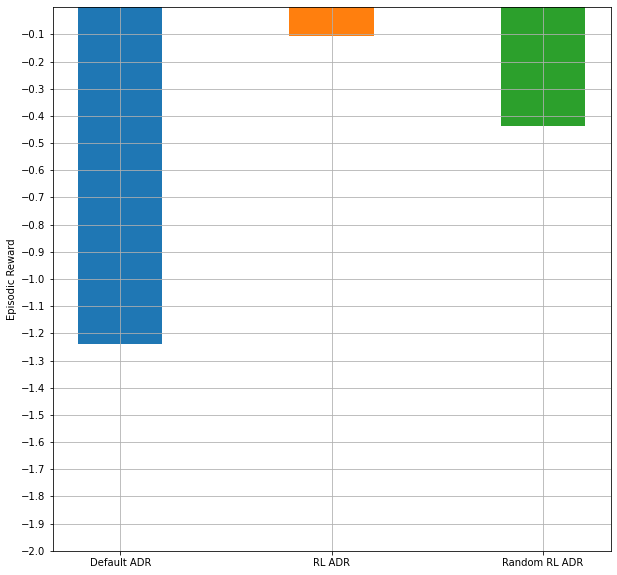

In [44]:
print(f"Default ADR: {score_adr}")
print(f"ADR RL: {score_adr_rl}")
print(f"ADR RL Random: {score_adr_rl_random}")

data = {'Default ADR': score_adr, 'RL ADR': score_adr_rl, 'Random RL ADR': score_adr_rl_random}
experiments = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 10))

plt.bar(experiments, values, width = 0.4, color=['C0','C1', 'C2', 'C3'])
plt.yticks(np.arange(-2, 0, 0.1))
plt.ylabel("Episodic Reward")
plt.grid()
plt.show()

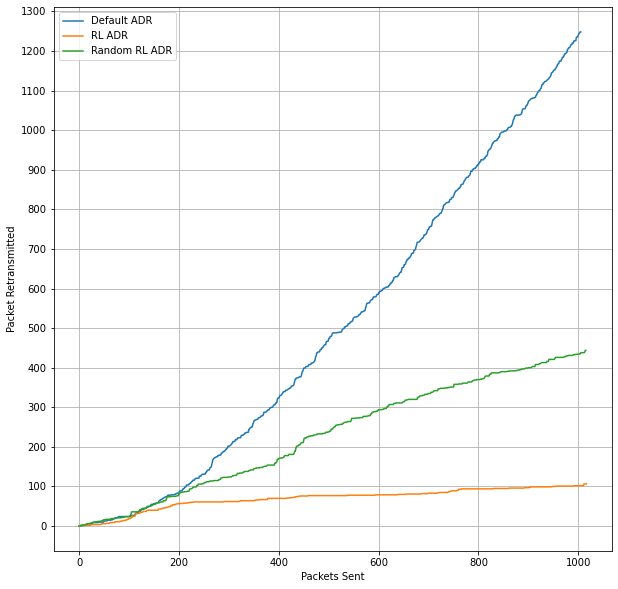

In [45]:
score_adr_episode = adr_env.gateway.retransmissions
score_adr_rl_episode = adr_rl_env.gateway.retransmissions
score_adr_rl_random_episode = adr_rl_random_env.gateway.retransmissions

fig = plt.figure(figsize = (10, 10))

plt.plot(score_adr_episode, label='Default ADR')
plt.plot(score_adr_rl_episode, label='RL ADR')
plt.plot(score_adr_rl_random_episode, label='Random RL ADR')
plt.yticks(np.arange(0, 1400, 100))
plt.ylabel("Packet Retransmitted")
plt.xlabel('Packets Sent')
plt.grid()
plt.legend()
plt.show()

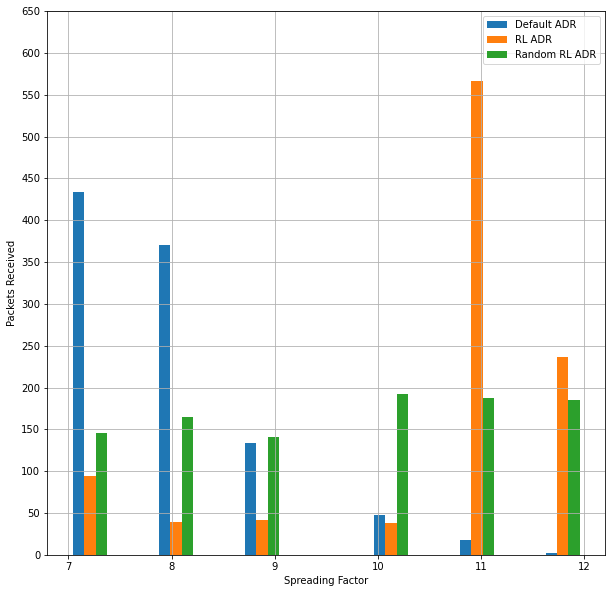

In [46]:
dr_adr_episode = adr_env.gateway.sf
dr_adr_rl_episode = adr_rl_env.gateway.sf
dr_adr_rl_random_episode = adr_rl_random_env.gateway.sf

fig = plt.figure(figsize = (10, 10))

plt.hist([dr_adr_episode, dr_adr_rl_episode, dr_adr_rl_random_episode], bins=12,
         label=['Default ADR', 'RL ADR', 'Random RL ADR'])
plt.ylabel('Packets Received')
plt.xlabel('Spreading Factor')
plt.yticks(np.arange(0, 700, 50))
plt.legend()
plt.grid()
plt.show()



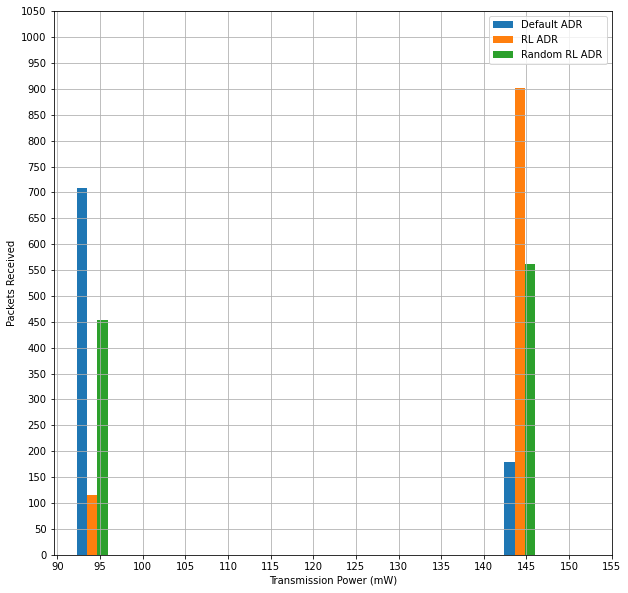

In [47]:
tx_power_mW = {2: 91.8, 5: 95.9, 8: 101.6, 11: 120.8, 14: 146.5}

dr_adr_episode = [tx_power_mW[x] for x in [y for y in adr_env.gateway.tp if y in [2, 14]]]
dr_adr_rl_episode = [tx_power_mW[x] for x in adr_rl_env.gateway.tp]
dr_adr_rl_random_episode = [tx_power_mW[x] for x in adr_rl_random_env.gateway.tp]

fig = plt.figure(figsize = (10, 10))

plt.hist([dr_adr_episode, dr_adr_rl_episode, dr_adr_rl_random_episode], bins=12,
         label=['Default ADR', 'RL ADR', 'Random RL ADR'])
plt.ylabel('Packets Received')
plt.xlabel('Transmission Power (mW)')
plt.yticks(np.arange(0, 1100, 50))
plt.xticks(np.arange(90, 160, 5))
plt.legend()
plt.grid()
plt.show()

416.09853440000006
258.8959232000001
174.72995200000005
364.5539008000002
651.6132032000002
376.69710080000027
600.4777920000004
280.3879296000001
553.6378368000004
593.3659392000003
582.1017152000004
458.2338112000003
251.75790080000013
600.8521600000004
174.72995200000005
502.6978496000003
211.73801600000007
505.07376640000035
342.0675200000002
327.6499456000002
417.1662336000002
280.3879296000001
325.05863680000016
355.8579136000002
367.6698304000002
239.48650240000012
488.4233536000003
189.82394880000007
652.6434432000004
189.82394880000007
269.9042368000001
244.3265472000001
189.82394880000007
231.4423168000001
174.72995200000005
432.63150080000025
478.9078656000003
614.0138240000005
244.45372800000013
476.6098880000003
341.4157184000002
455.11788160000026
372.50987520000024
159.63595520000004
220.0119424000001
742.9079424000005
486.1007552000003
561.8759359999999
295.48192640000013
189.82394880000007
503.27171200000026
304.5999744000002
174.72995200000005
176.28791680000006
204.9

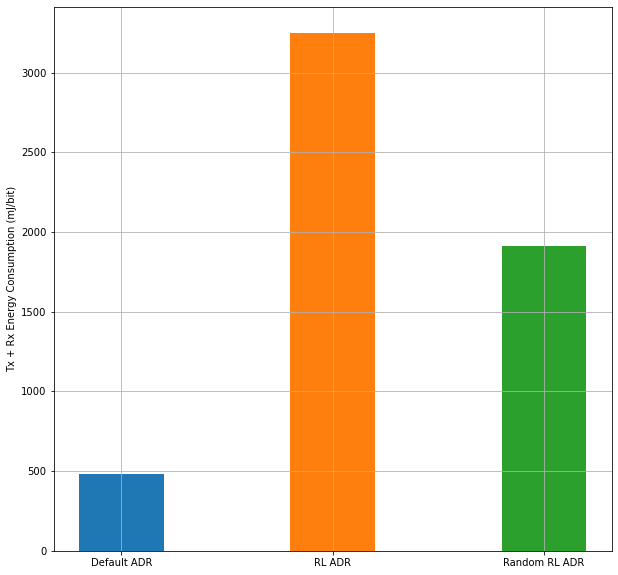

In [48]:
mean_energy_per_bit_list = []
for n in adr_env.nodes:
    print(n.energy_tracking['TX'])
    mean_energy_per_bit_list.append(n.transmit_related_energy_consumed())

adr_env_energy = sum(mean_energy_per_bit_list)/len(mean_energy_per_bit_list)

no_adr_env_energy = sum(mean_energy_per_bit_list)/len(mean_energy_per_bit_list)

mean_energy_per_bit_list = []
for n in adr_rl_env.nodes:
    print(n.energy_tracking['TX'])
    mean_energy_per_bit_list.append(n.transmit_related_energy_consumed())

adr_rl_env_energy = sum(mean_energy_per_bit_list)/len(mean_energy_per_bit_list)

mean_energy_per_bit_list = []
for n in adr_rl_random_env.nodes:
    mean_energy_per_bit_list.append(n.transmit_related_energy_consumed())

adr_rl_random_env_energy = sum(mean_energy_per_bit_list)/len(mean_energy_per_bit_list)

print(f"Default ADR: {adr_env_energy}")
print(f"ADR RL: {adr_rl_env_energy}")
print(f"ADR RL Random: {adr_rl_random_env_energy}")

data = {'Default ADR': adr_env_energy, 'RL ADR': adr_rl_env_energy, 'Random RL ADR': adr_rl_random_env_energy}
experiments = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 10))

plt.bar(experiments, values, width = 0.4, color=['C0','C1', 'C2', 'C3'])
#plt.yticks(np.arange(-2, 0, 0.1))
plt.ylabel("Tx + Rx Energy Consumption (mJ/bit)")
plt.grid()
plt.show()

In [49]:
adr_env_packet_rec = adr_env.gateway.get_simulation_data()
adr_rl_env_packet_rec = adr_rl_env.gateway.get_simulation_data()
adr_rl_random_env_packet_rec = adr_rl_random_env.gateway.get_simulation_data()

print(f"Default ADR: {adr_env_packet_rec}")
print(f"ADR RL: {adr_rl_env_packet_rec}")
print(f"ADR RL Random: {adr_rl_random_env_packet_rec}")

Default ADR: BytesReceived            50300
DLPacketsLost               13
ULWeakPackets             1265
PacketsReceived           1006
UniquePacketsReceived      993
dtype: int64
ADR RL: BytesReceived            50850
DLPacketsLost               22
ULWeakPackets               83
PacketsReceived           1017
UniquePacketsReceived      995
dtype: int64
ADR RL Random: BytesReceived            50800
DLPacketsLost               24
ULWeakPackets              418
PacketsReceived           1016
UniquePacketsReceived      992
dtype: int64
